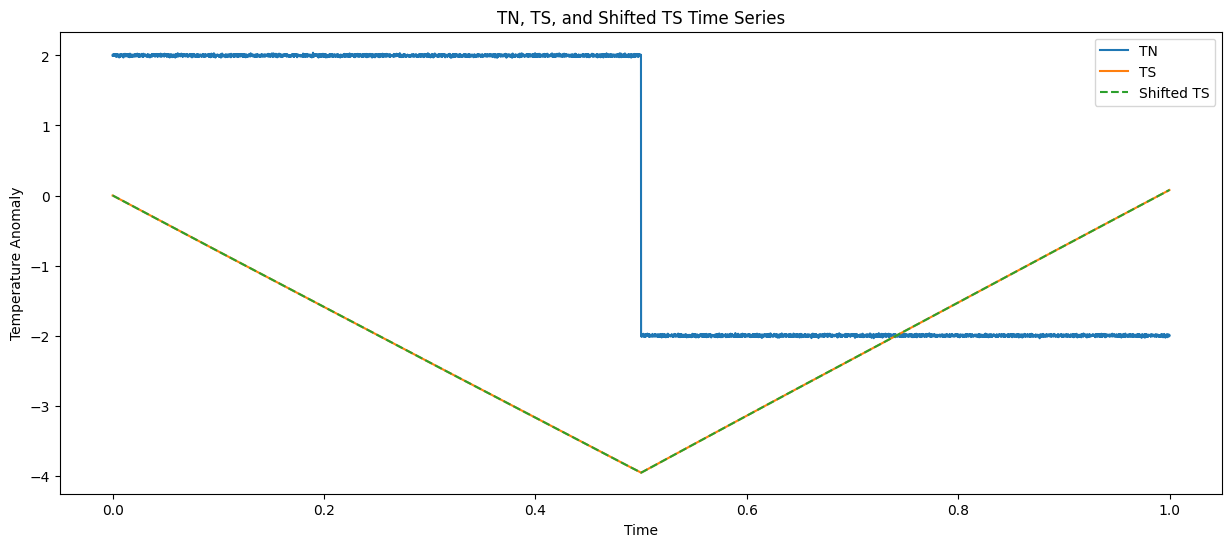

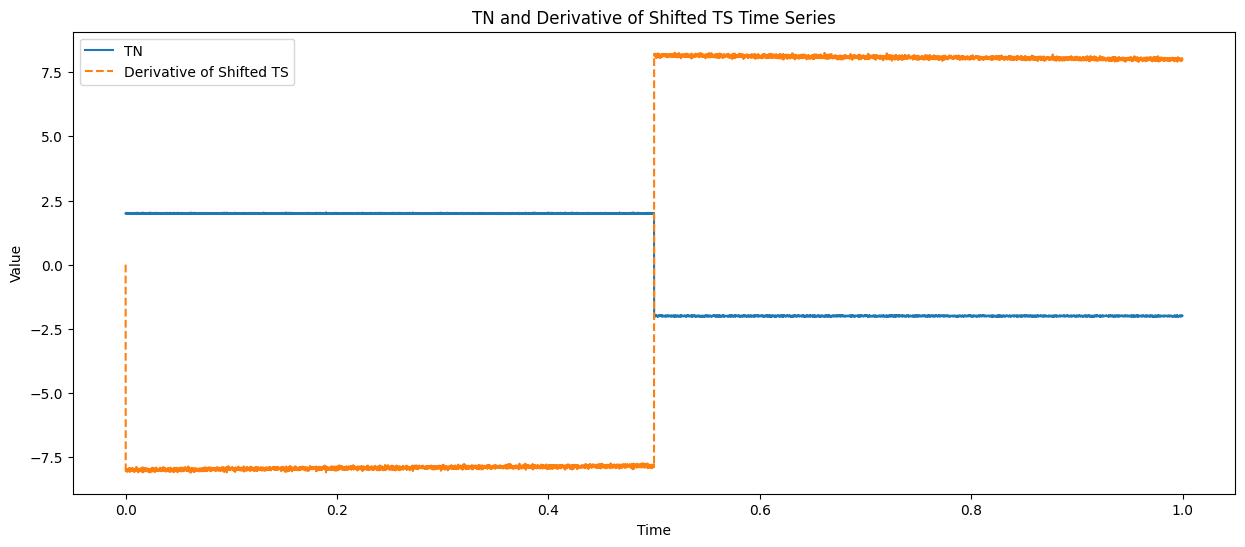

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Time array
t = np.linspace(0, 1, 10000, endpoint=False)
dt = t[1] - t[0]  # dt = 0.001

# Parameters for random durations
min_pos_duration = 5000   # Minimum duration of positive segment (samples)
max_pos_duration = 5000  # Maximum duration of positive segment
min_neg_duration = 5000   # Minimum duration of negative segment (samples)
max_neg_duration = 5000  # Maximum duration of negative segment

# Amplitude values for TN
positive_value = 2     # Adjust as needed
negative_value = -2    # Adjust as needed

# Initialize TN
TN = np.zeros(len(t))

# Generate TN with random durations
current_sample = 0

while current_sample < len(t):
    # Random positive duration
    pos_duration = np.random.randint(min_pos_duration, max_pos_duration + 1)
    end_pos = min(current_sample + pos_duration, len(t))
    TN[current_sample:end_pos] = positive_value
    current_sample = end_pos

    if current_sample >= len(t):
        break

    # Random negative duration
    neg_duration = np.random.randint(min_neg_duration, max_neg_duration + 1)
    end_neg = min(current_sample + neg_duration, len(t))
    TN[current_sample:end_neg] = negative_value
    current_sample = end_neg

# Add some noise to TN if desired
# TN += np.random.normal(0, 0.1, size=TN.shape)

tau = 25  # Characteristic timescale
TS_initial = 0  # Initial condition for TS

# Initialize TS
TS = np.zeros(len(TN))
TS[0] = TS_initial

# Recursive calculation of TS with correct dt
for i in range(1, len(TN) - 1):
    TN[i] = TN[i]  + np.random.normal(0, 0.01)
    TS[i + 1] = TS[i] + dt * (1 / tau) * (-TN[i] - TS[i])

TS = TS * 100
lag = 0
# Shift TS right by lag
TS_shifted = np.roll(TS, lag)
# Crop the TS_shifted and TN array to exclude the lagged values
TS_shifted = TS_shifted[lag:]
TN = TN[lag:]
# Crop t and TS
t = t[lag:]
TS = TS[lag:]

# Plotting original data
plt.figure(figsize=(15, 6))
plt.plot(t, TN, label='TN')
plt.plot(t, TS, label='TS')
plt.plot(t, TS_shifted, label='Shifted TS', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly')
plt.title('TN, TS, and Shifted TS Time Series')
plt.legend()
plt.show()

# Compute the derivative of TS_shifted
diff_TS_shifted = np.diff(TS_shifted) / dt

# Adjust TN, t, and TS to match the length of diff_TS_shifted
TN = TN[:-1]
t = t[:-1]
TS = TS[:-1]



# Plotting the corrected diff data
plt.figure(figsize=(15, 6))
plt.plot(t, TN, label='TN')
plt.plot(t, diff_TS_shifted, label='Derivative of Shifted TS', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('TN and Derivative of Shifted TS Time Series')
plt.legend()
plt.show()


Text(0.5, 1.0, 'TN and Derivative of Shifted TS Time Serie, interstadial')

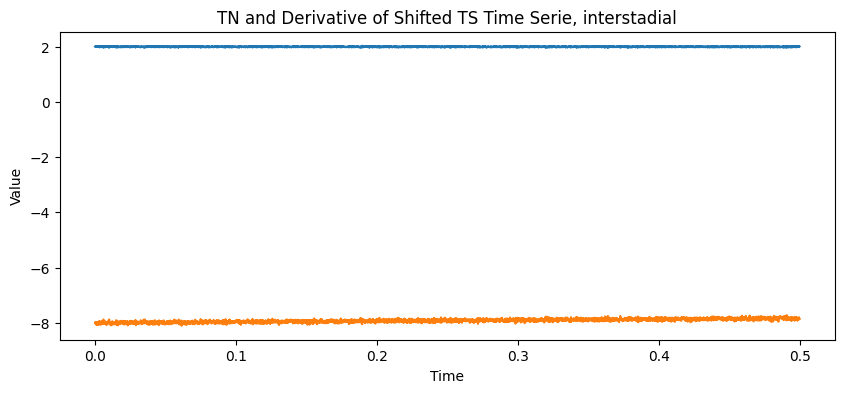

In [40]:
# Crop the 2 to 4998 of TN and diff_TS_shifted
TN_GI = TN[2:4998]
diff_TS_shifted_GI = diff_TS_shifted[2:4998]
# plot the cropped data
plt.figure(figsize=(10, 4))
plt.plot(t[2:4998], TN_GI, label='TN')
plt.plot(t[2:4998], diff_TS_shifted_GI, label='Derivative of Shifted TS', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('TN and Derivative of Shifted TS Time Serie, interstadial')

Text(0.5, 1.0, 'TN and Derivative of Shifted TS Time Serie, stadial')

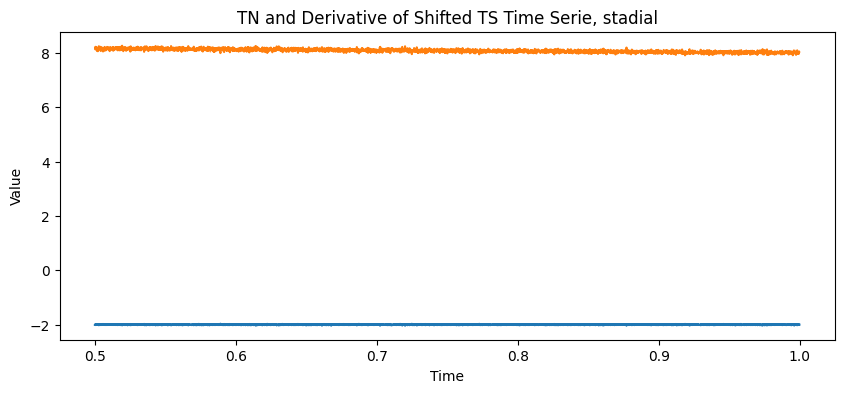

In [41]:
# crop the GS data, which is from 5002 to 9998
TN_GS = TN[5002:9998]
diff_TS_shifted_GS = diff_TS_shifted[5002:9998]
# plot the cropped data
plt.figure(figsize=(10, 4))
plt.plot(t[5002:9998], TN_GS, label='TN')
plt.plot(t[5002:9998], diff_TS_shifted_GS, label='Derivative of Shifted TS', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('TN and Derivative of Shifted TS Time Serie, stadial')


# Test the linearity

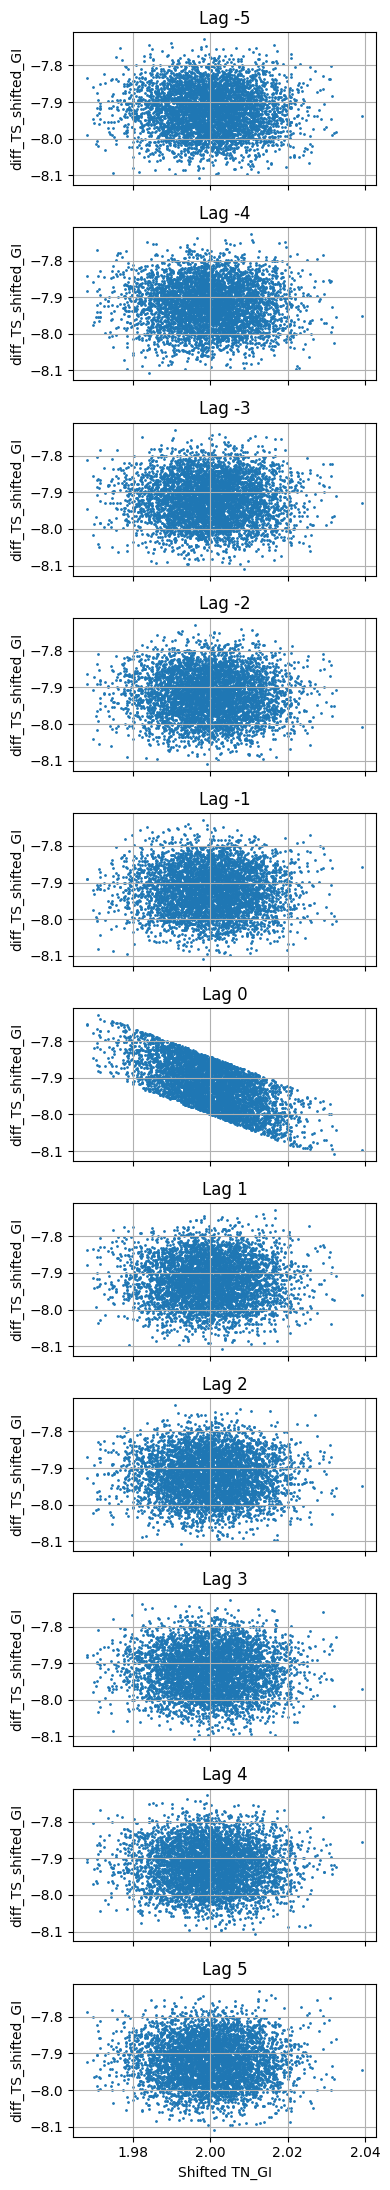

In [42]:
# Define the range of lags from -5 to 5
lags = range(-5, 6)  # This includes lags from -5 to 5 inclusive

# Create subplots
num_plots = len(lags)
fig, axes = plt.subplots(num_plots, 1, figsize=(4, num_plots * 2), sharex=True)

for idx, lag in enumerate(lags):
    if lag > 0:
        # Positive lag: shift TN forward
        shifted_TN = TN_GI[lag:]
        diff_TS_shifted_lag = diff_TS_shifted_GI[:-lag]
    elif lag < 0:
        # Negative lag: shift TN backward
        lag_abs = -lag
        shifted_TN = TN_GI[:-lag_abs]
        diff_TS_shifted_lag = diff_TS_shifted_GI[lag_abs:]
    else:
        # Zero lag: no shift
        shifted_TN = TN_GI
        diff_TS_shifted_lag = diff_TS_shifted_GI

    # Ensure the arrays are of the same length
    min_length = min(len(shifted_TN), len(diff_TS_shifted_lag))
    shifted_TN = shifted_TN[:min_length]
    diff_TS_shifted_lag = diff_TS_shifted_lag[:min_length]

    # Plot diff_TS_shifted vs shifted_TN
    axes[idx].scatter(shifted_TN, diff_TS_shifted_lag, s=1)
    axes[idx].set_title(f'Lag {lag}')
    axes[idx].set_ylabel('diff_TS_shifted_GI')
    axes[idx].grid(True)

# Set the xlabel for the last subplot
axes[-1].set_xlabel('Shifted TN_GI')

plt.tight_layout()
plt.show()



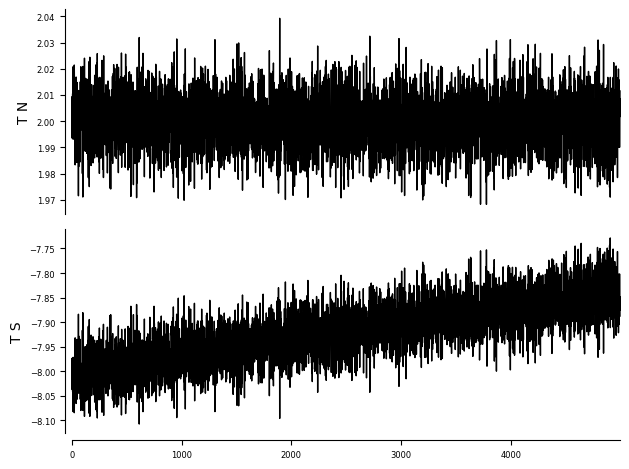

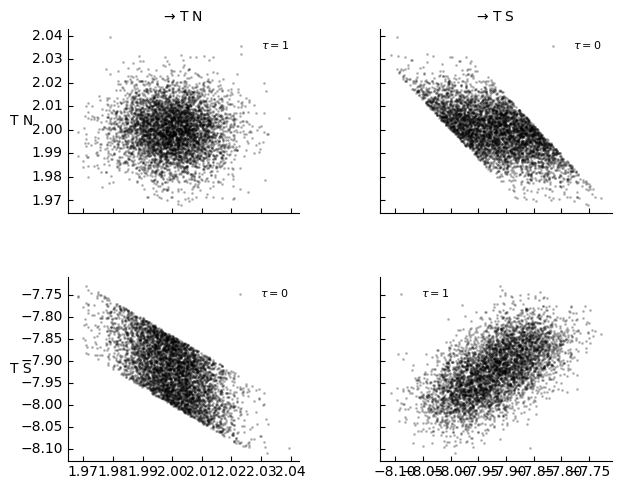


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


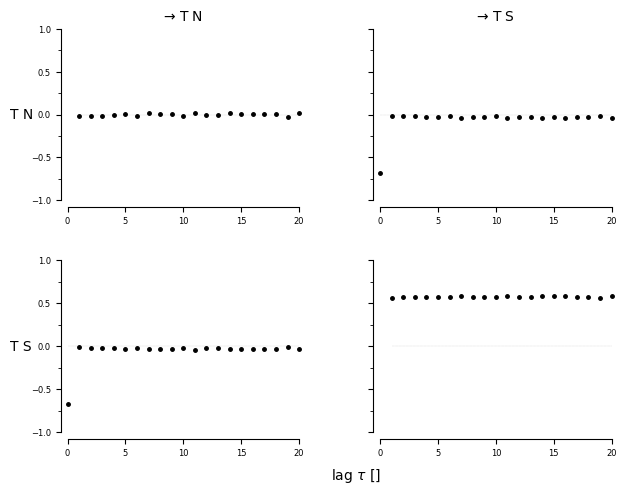


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable T N has 2 link(s):
    [pc_alpha = 0.3]
        (T N -1): max_pval = 0.15095, |min_val| =  0.020
        (T S -5): max_pval = 0.22300, |min_val| =  0.017

    Variable T S has 2 link(s):
    [pc_alpha = 0.05]
        (T S -5): max_pval = 0.00000, |min_val| =  0.185
        (T N -5): max_pval = 0.02865, |min_val| =  0.031

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 5
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.01:

    Variable T N has 1 link(s):
        (T S  0): pval = 0.00000 | val = -1.000 | unoriented link

    Variable T S has 2 link(s):
        (T N  0): pval = 0.00000 | val = -1.000 | unoriented link
        (T N -5): pval = 0.00

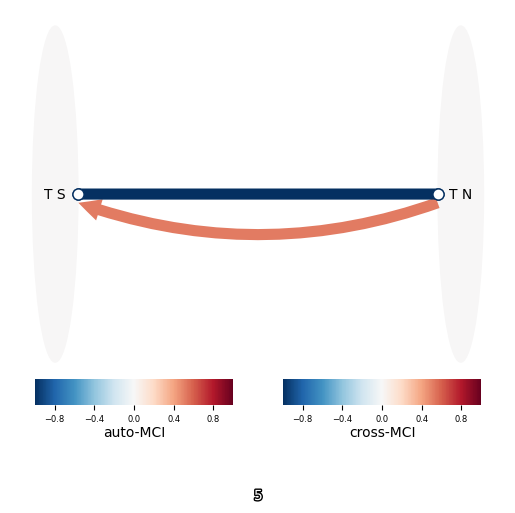

In [43]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




var_names = [r'T N', r'T S']
# data = np.array([TN, TS_shifted]).T

# Replace TS_shifted in data with diff_TS_shifted
data = np.array([TN_GI, diff_TS_shifted_GI]).T

dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=0
tau_max=5
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min, pc_alpha=None, alpha_level=0.01)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()




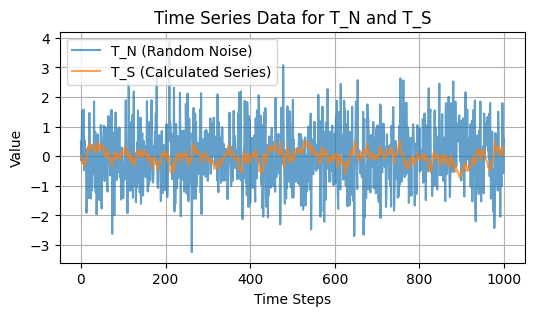

In [ ]:
import numpy as np

# Constants
delta_t = 1
tau = 10

# Generate random data for TN
np.random.seed(42)  # For reproducibility
TN = np.random.randn(1000)  # 1000 random values

# Initialize TS with first value as 0
TS = np.zeros_like(TN)
TS[0] = 0

# Compute TS using the given equation
for i in range(len(TS) - 1):
    TS[i + 1] = TS[i] + delta_t * 1/tau * (-TN[i] - TS[i])



import matplotlib.pyplot as plt

# Plotting TN and TS
plt.figure(figsize=(6, 3))
plt.plot(TN, label='T_N (Random Noise)', alpha=0.7)
plt.plot(TS, label='T_S (Calculated Series)', alpha=0.7)
plt.title('Time Series Data for T_N and T_S')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import matplotlib.pyplot as plt

def test_lagged_linearity(lags, TN, TS):
    # Create subplots
    num_plots = len(lags)
    fig, axes = plt.subplots(num_plots, 1, figsize=(4, num_plots * 2), sharex=True)

    for idx, lag in enumerate(lags):
        if lag > 0:
            # Positive lag: shift TN forward
            shifted_TN = TN[lag:]
            shifted_TS = TS[:-lag]
        elif lag < 0:
            # Negative lag: shift TN backward
            lag_abs = -lag
            shifted_TN = TN[:-lag_abs]
            shifted_TS = TS[lag_abs:]
        else:
            # Zero lag: no shift
            shifted_TN = TN
            shifted_TS = TS

        # Ensure the arrays are of the same length
        min_length = min(len(shifted_TN), len(shifted_TS))
        shifted_TN = shifted_TN[:min_length]
        shifted_TS = shifted_TS[:min_length]

        # Plot TS vs shifted TN
        axes[idx].scatter(shifted_TN, shifted_TS, s=1)
        axes[idx].set_title(f'Lag {lag}')
        axes[idx].set_ylabel('Shifted TS')
        axes[idx].grid(True)

    # Set the xlabel for the last subplot
    axes[-1].set_xlabel('Shifted TN')

    plt.tight_layout()
    plt.show()

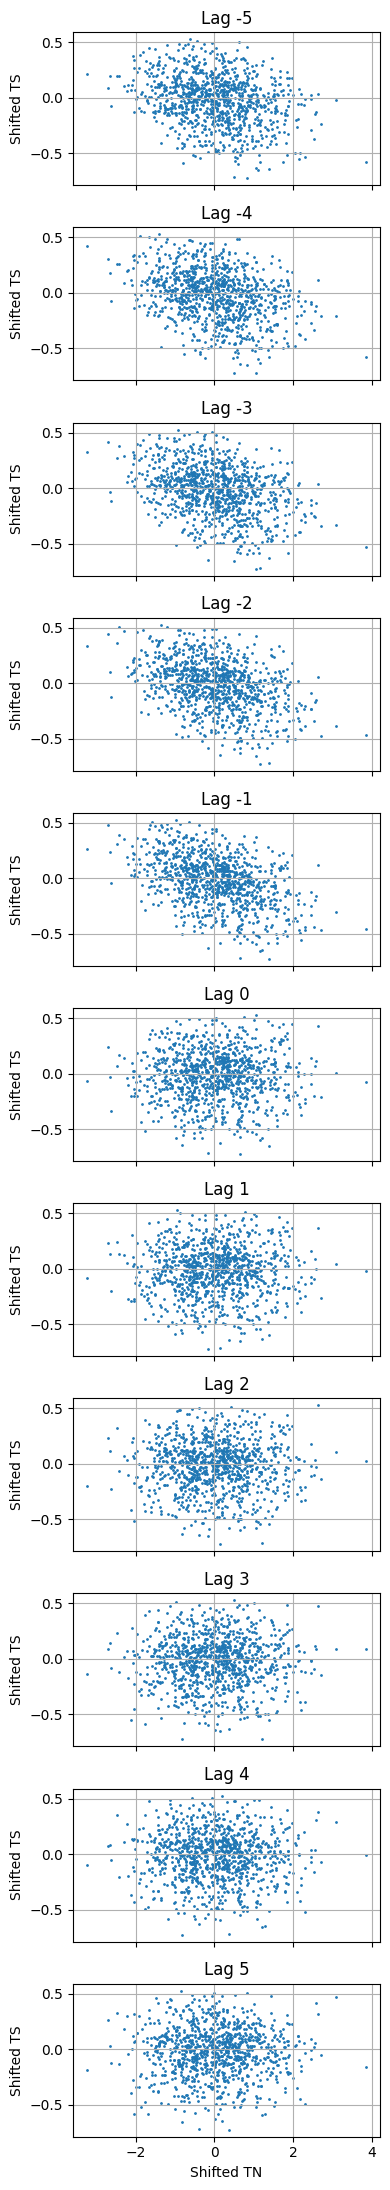

In [28]:

lags = range(-5, 6)  # Define the range of lags from -5 to 5
test_lagged_linearity(lags, TN, TS)


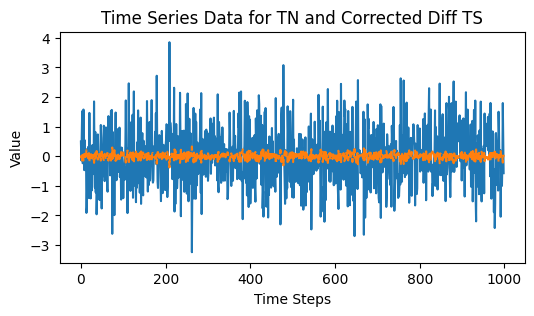

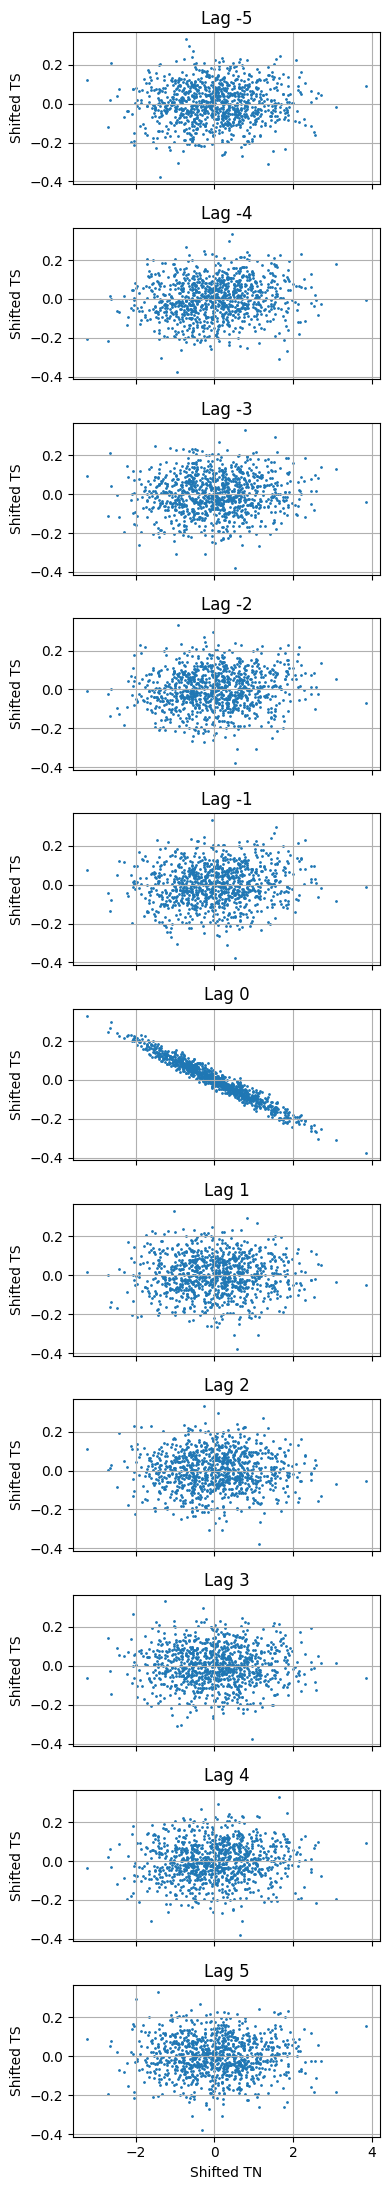

In [30]:
# calculate the diff TS and crop TN to match the length of diff TS
diff_TS = np.diff(TS) / delta_t
TN_cropped = TN[:-1]

# Plotting the corrected diff data
plt.figure(figsize=(6, 3))
plt.plot(TN_cropped, label='TN (Cropped)')
plt.plot(diff_TS, label='Diff TS (Corrected)', linestyle='--')
plt.title('Time Series Data for TN and Corrected Diff TS')
plt.xlabel('Time Steps')
plt.ylabel('Value')

# test the lagged linearity of the cropped data
test_lagged_linearity(lags, TN_cropped, diff_TS)


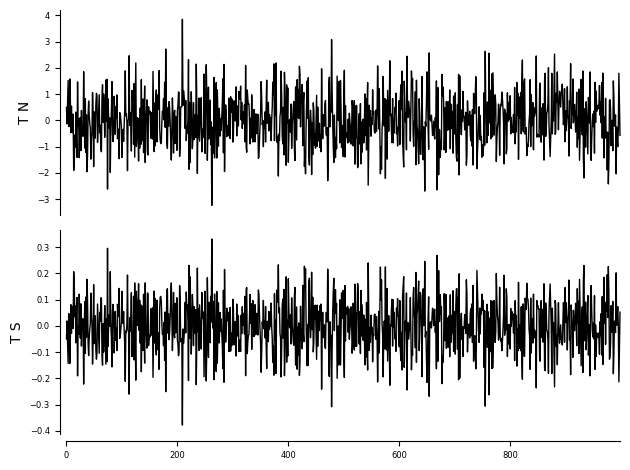

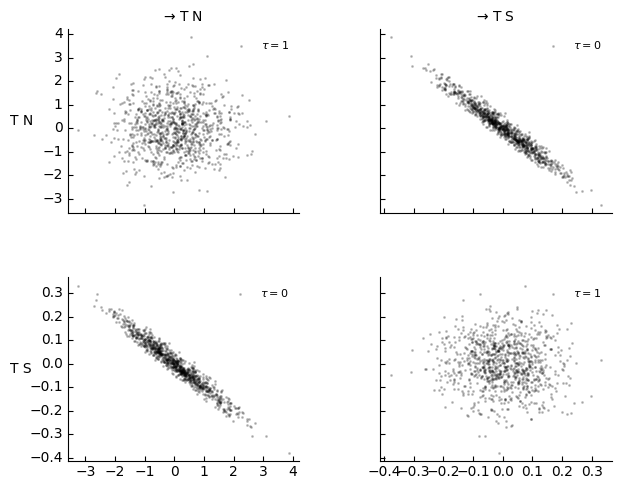


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 20


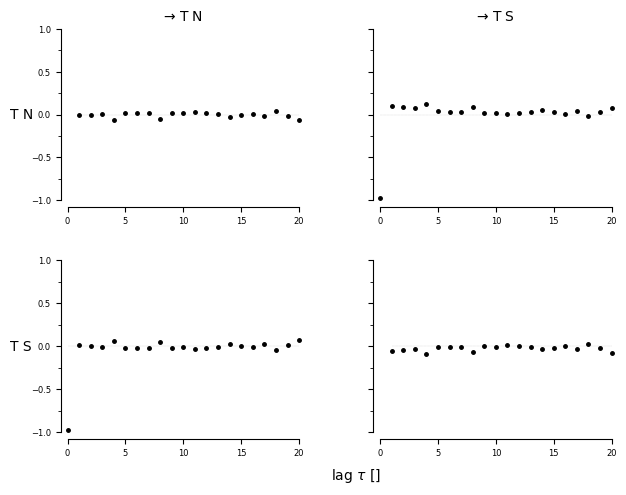


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable T N has 0 link(s):

    Variable T S has 5 link(s):
        (T N -4): max_pval = 0.00007, |min_val| =  0.127
        (T N -1): max_pval = 0.00106, |min_val| =  0.104
        (T S -4): max_pval = 0.00245, |min_val| =  0.096
        (T N -2): max_pval = 0.00703, |min_val| =  0.086
        (T N -3): max_pval = 0.03399, |min_val| =  0.067

##
## Step 2: MCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 5
max_conds_py = None
max_conds_px = None

## Significant links at alpha = 0.05:

    Variable T N has 1 link(s):
        (T S  0): pval = 0.00000 | val = -1.000 | unoriented link

    Variable T S has 5 link(s):
        (T N  0): pval = 0.00000 | val = -1.000 | unoriented link
        (T N -4): pval = 0.00000 | val =

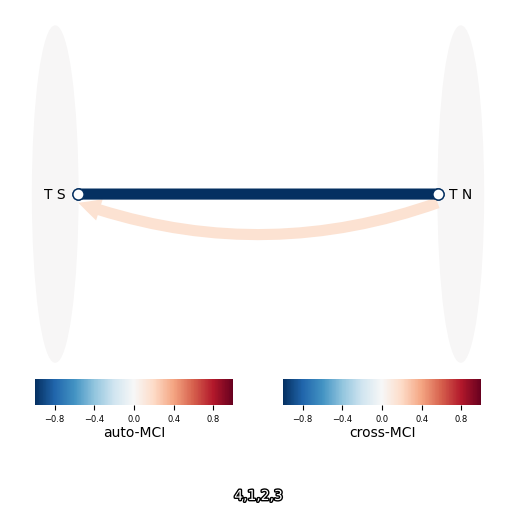

In [38]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
# from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI




var_names = [r'T N', r'T S']
# data = np.array([TN, TS_shifted]).T

# Replace TS_shifted in data with diff_TS_shifted
data = np.array([TN_cropped, diff_TS]).T

dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)


tp.plot_timeseries(dataframe); plt.show()

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)


matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()



pcmci.verbosity = 1
tau_min=0
tau_max=5
results = pcmci.run_pcmci(tau_max=tau_max, tau_min=tau_min)

# results = pcmci.run_pcmciplus(tau_max=tau_max, tau_min=tau_min)

tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    )
plt.show()


